In [1]:
import  pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r'F:\datasets\bank-full.csv',sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
from sklearn.preprocessing import OrdinalEncoder

In [8]:
oe=OrdinalEncoder()

In [9]:
char=df.select_dtypes(object).columns

In [10]:
df[char]=oe.fit_transform(df[char])        #change object colum to int in df
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0,0.0
1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,8.0,151,1,-1,0,3.0,0.0
2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,8.0,76,1,-1,0,3.0,0.0
3,47,1.0,1.0,3.0,0.0,1506,1.0,0.0,2.0,5,8.0,92,1,-1,0,3.0,0.0
4,33,11.0,2.0,3.0,0.0,1,0.0,0.0,2.0,5,8.0,198,1,-1,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9.0,1.0,2.0,0.0,825,0.0,0.0,0.0,17,9.0,977,3,-1,0,3.0,1.0
45207,71,5.0,0.0,0.0,0.0,1729,0.0,0.0,0.0,17,9.0,456,2,-1,0,3.0,1.0
45208,72,5.0,1.0,1.0,0.0,5715,0.0,0.0,0.0,17,9.0,1127,5,184,3,2.0,1.0
45209,57,1.0,1.0,1.0,0.0,668,0.0,0.0,1.0,17,9.0,508,4,-1,0,3.0,0.0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x=df.iloc[:,:-1]
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0
1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,8.0,151,1,-1,0,3.0
2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,8.0,76,1,-1,0,3.0
3,47,1.0,1.0,3.0,0.0,1506,1.0,0.0,2.0,5,8.0,92,1,-1,0,3.0
4,33,11.0,2.0,3.0,0.0,1,0.0,0.0,2.0,5,8.0,198,1,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9.0,1.0,2.0,0.0,825,0.0,0.0,0.0,17,9.0,977,3,-1,0,3.0
45207,71,5.0,0.0,0.0,0.0,1729,0.0,0.0,0.0,17,9.0,456,2,-1,0,3.0
45208,72,5.0,1.0,1.0,0.0,5715,0.0,0.0,0.0,17,9.0,1127,5,184,3,2.0
45209,57,1.0,1.0,1.0,0.0,668,0.0,0.0,1.0,17,9.0,508,4,-1,0,3.0


In [13]:
y=df.iloc[:,-1]

In [14]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=2)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lg=LogisticRegression()

In [17]:
lg.fit(xtrain,ytrain)

LogisticRegression()

In [18]:
ypred=lg.predict(xtest)

In [19]:
print('act val :',ytest.values[:25])
print('pred val:',ypred[:25])

act val : [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0.]
pred val: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [20]:
from sklearn.metrics import classification_report

False positives occur when the model predicts a positive outcome,
but it is not actually the case.in the context of logistic regression,a false postive woud mean predicting that the client has subscribed to the term depositwhen they have not.this can lead to inappropriate marketing efforts and additional costs for the bank or financial instituation.


In [21]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      9991
         1.0       0.56      0.19      0.28      1312

    accuracy                           0.89     11303
   macro avg       0.73      0.58      0.61     11303
weighted avg       0.86      0.89      0.86     11303



In [22]:
from sklearn.feature_selection import RFE

In [23]:
rfe=RFE(estimator=LogisticRegression())

In [24]:
rfe.fit(x,y)

RFE(estimator=LogisticRegression())

In [27]:
rfe_df = pd.DataFrame(rfe.ranking_).T
rfe_df.columns = x.columns
rfe_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,6,4,1,1,1,9,1,1,1,5,2,7,1,8,1,3


In [28]:
rfe_df = pd.DataFrame({
    'Ranking' : rfe.ranking_,
    'Features' : x.columns
})
rfe_df.sort_values('Ranking')

,Ranking,Features
2,1,marital
3,1,education
4,1,default
6,1,housing
7,1,loan
8,1,contact
12,1,campaign
14,1,previous
10,2,month
15,3,poutcome


In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dt=DecisionTreeClassifier()

In [31]:
dt.fit(x,y)

DecisionTreeClassifier()

In [32]:
dt.feature_importances_

array([0.09703986, 0.04206142, 0.01898419, 0.02626102, 0.00184499,
       0.12318414, 0.0224314 , 0.00833367, 0.01707703, 0.08839626,
       0.09993371, 0.29086063, 0.0372225 , 0.05713638, 0.01293044,
       0.05630237])

In [33]:
imp_cols = pd.DataFrame({
    'Features' : x.columns,
    'IG' : dt.feature_importances_
})

In [34]:
imp_cols.sort_values('IG',ascending=False)

,Features,IG
11,duration,0.290861
5,balance,0.123184
10,month,0.099934
0,age,0.097040
9,day,0.088396
13,pdays,0.057136
15,poutcome,0.056302
1,job,0.042061
12,campaign,0.037223
3,education,0.026261


In [35]:
#here false positive is more concern therefore increased precision value

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
print(confusion_matrix(ytest,ypred))

[[9792  199]
 [1063  249]]


In [38]:
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,precision_score

In [39]:
proba=lg.predict_proba(xtest)

In [40]:
proba=lg.predict_proba(xtest)[:,1]

In [41]:
auc=roc_auc_score(ytest,proba)

In [42]:
auc

0.8075411162729383

In [43]:
fpr,tpr,thresh=roc_curve(ytest,proba)

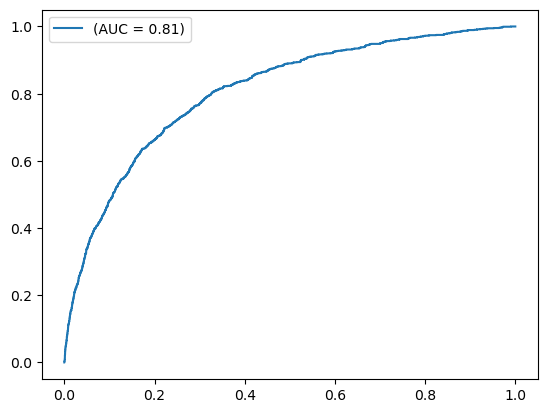

In [44]:
plt.plot(fpr,tpr,label= '(AUC = %0.2f)'%auc)
plt.legend()

In [45]:
accuracy=[]
precision=[]
for i in thresh:
    ypred=np.where(proba>i,1,0)
    accuracy.append(accuracy_score(ytest,ypred))
    precision.append(precision_score(ytest,ypred))
    
final_thresh=pd.DataFrame({
    'thresh':thresh,
    'accuracy':accuracy,
    'precision':precision
})    

In [46]:
final_thresh

,thresh,accuracy,precision
0,1.999922e+00,0.883925,0.000000
1,9.999222e-01,0.883925,0.000000
2,9.996953e-01,0.883925,0.500000
3,9.992778e-01,0.884013,0.666667
4,9.859799e-01,0.884190,0.714286
...,...,...,...
1911,3.273456e-03,0.140228,0.118810
1912,3.266936e-03,0.140140,0.118799
1913,3.876855e-04,0.124834,0.117033
1914,3.825935e-04,0.124746,0.117022


In [47]:
final_thresh.sort_values(by='precision',ascending=False)

,thresh,accuracy,precision
5,9.829227e-01,0.884279,0.750000
25,8.858500e-01,0.886490,0.730159
27,8.839072e-01,0.886579,0.727273
24,8.888246e-01,0.886402,0.725806
23,8.962685e-01,0.886225,0.724138
...,...,...,...
1913,3.876855e-04,0.124834,0.117033
1914,3.825935e-04,0.124746,0.117022
1915,4.968188e-09,0.116164,0.116086
1,9.999222e-01,0.883925,0.000000


In [48]:
from sklearn.preprocessing import binarize

In [49]:
ypred=binarize([proba],threshold=5.831831e-01)[0]

In [50]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      9991
         1.0       0.60      0.14      0.23      1312

    accuracy                           0.89     11303
   macro avg       0.75      0.56      0.58     11303
weighted avg       0.86      0.89      0.86     11303

